<a href="https://colab.research.google.com/github/ninja03jod/Bank_Statement_Analysis/blob/main/Bank_Statement_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Import the Libraries**

In [ ]:
import sklearn
import json
from pandas import json_normalize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **2. Load and Explore the Dataset**

### **2.1 Display Setting**

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
sklearn.set_config(transform_output='pandas')

In [ ]:
with open('/content/P1- BankStatements.json','r') as f:
  bank_stats = json.load(f)
bank_stats

{'Account': {'type': 'deposit',
  'maskedAccNumber': 'XXXX6461',
  'version': '1.1',
  'linkedAccRef': '02f28b8d-d8a3-43d7-88c6-5fabb2e51541',
  'xmlns': 'http://api.rebit.org.in/FISchema/deposit',
  'xsi:schemaLocation': 'http://api.rebit.org.in/FISchema/deposit.xsd',
  'xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance',
  'Profile': {'Holders': {'type': 'SINGLE',
    'Holder': {'name': 'Arun Shakya',
     'dob': '2000-06-09',
     'mobile': '8429489761',
     'nominee': 'REGISTERED',
     'address': '',
     'email': 'NA',
     'pan': 'FORM60',
     'ckycCompliance': 'true'}}},
  'Summary': {'currentBalance': '761.41',
   'currency': 'INR',
   'exchgeRate': '1',
   'balanceDateTime': '2024-05-30T03:05:12+05:30',
   'type': 'SAVINGS',
   'branch': 'AMETHI JADID, UP',
   'ifscCode': 'BARB0AMEJAD',
   'micrCode': '209012004',
   'openingDate': '2020-11-24',
   'currentODLimit': '0.00',
   'drawingLimit': '0.00',
   'status': 'ACTIVE',
   'Pending': {'amount': '0.0'}},
  'Transacti

## **3. Bank Statement Analysis**

In [ ]:
def parse_transactions(json_data):
    transactions = json_data['Account']['Transactions']['Transaction']
    df = pd.DataFrame(transactions)
    df['amount'] = df['amount'].astype(float)
    df['transactionTimestamp'] = pd.to_datetime(df['transactionTimestamp'])
    return df

In [ ]:
bank_statement = parse_transactions(bank_stats)
bank_statement

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
0,DEBIT,CARD,100.0,2180.80,2023-06-27 09:40:19+05:30,2023-06-27,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
1,DEBIT,CARD,170.0,2010.80,2023-06-28 09:51:57+05:30,2023-06-28,S76862822,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
2,DEBIT,CARD,500.0,1510.80,2023-07-26 10:04:00+05:30,2023-07-26,S31451661,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06 11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA
4,DEBIT,ATM,1000.0,525.80,2023-08-07 17:13:13+05:30,2023-08-07,S18475743,ATM/CASH/321917012791/XXXXXXXXXXXX8896,NA
...,...,...,...,...,...,...,...,...,...
980,DEBIT,UPI,80.0,23.41,2024-05-29 17:57:40+05:30,2024-05-29,S68913329,UPI/415067358040/175740/UPI/paytmqr1reyim9t8ap,NA
981,CREDIT,OTHERS,938.0,961.41,2024-05-30 05:07:05+05:30,2024-05-30,S87517914,NEFT-AXNPN15145877034-PHONEPE PRIVATE LIMITED-...,922020004688715
982,DEBIT,UPI,60.0,901.41,2024-05-30 09:58:24+05:30,2024-05-30,S94085910,UPI/451708846336/095823/UPI/Q936188905ybl/Paym,NA
983,DEBIT,UPI,130.0,771.41,2024-05-30 13:30:30+05:30,2024-05-30,S4676116,UPI/451747322898/133029/UPI/Q601737327ybl/Paym,NA


## **Columns :**


##### **type:**  Indicates the type of transaction (e.g., DEBIT or CREDIT).

##### **mode:**  Describes the mode of transaction (e.g., CARD, UPI, ATM).

##### **amount:** Specifies the transaction amount in the account's currency (float).

##### **currentBalance:** Represents the account balance after the transaction (float).

##### **transactionTimestamp:** Provides the date and time when the transaction occurred (datetime).

##### **valueDate:** Indicates the date when the transaction amount is applied to the account (datetime).

##### **txnId:** Transaction identifier or reference number.

##### **narration:** Short description or narration of the transaction, often containing additional details such as payee information or transaction purpose.

##### **reference:** Additional reference information related to the transaction.

In [ ]:
(
    bank_statement
  .columns
)

Index(['type', 'mode', 'amount', 'currentBalance', 'transactionTimestamp',
       'valueDate', 'txnId', 'narration', 'reference'],
      dtype='object')

In [ ]:
# Total Records
(
    bank_statement
    .shape
)

(985, 9)

### **3.1 check data types**

In [ ]:
(
  bank_statement
  .dtypes
)

type                                       object
mode                                       object
amount                                    float64
currentBalance                             object
transactionTimestamp    datetime64[ns, UTC+05:30]
valueDate                                  object
txnId                                      object
narration                                  object
reference                                  object
dtype: object

In [ ]:
# current balance have data types object

(
    bank_statement
    .currentBalance
    .loc[6]
)

'3524.80'

In [ ]:
# valudate column also data type is an obeject it should be datetime
(
    bank_statement
    .valueDate
    .loc[6]
)

'2023-08-22'

### **3.2 check duplicates**

In [ ]:
bank_statement.duplicated().sum()

0

### **3.3 Observation:**

>- After acrefully reveiwing the data types of columns.
>- Current balance has data tpe is object type and for value date data type is object type.
>- According to there nature of data we have to change there data types.

## **4. Preliminary Analysis :**


### **type**

In [ ]:
bank_statement.type

0       DEBIT
1       DEBIT
2       DEBIT
3      CREDIT
4       DEBIT
        ...  
980     DEBIT
981    CREDIT
982     DEBIT
983     DEBIT
984     DEBIT
Name: type, Length: 985, dtype: object

In [ ]:
bank_statement.type.unique()

array(['DEBIT', 'CREDIT'], dtype=object)

### **mode**

In [ ]:
bank_statement['mode']

0        CARD
1        CARD
2        CARD
3      OTHERS
4         ATM
        ...  
980       UPI
981    OTHERS
982       UPI
983       UPI
984       UPI
Name: mode, Length: 985, dtype: object

In [ ]:
bank_statement['mode'].unique()

array(['CARD', 'OTHERS', 'ATM', 'UPI', 'CASH'], dtype=object)

### **amount**

In [ ]:
bank_statement['amount']

0       100.0
1       170.0
2       500.0
3        15.0
4      1000.0
        ...  
980      80.0
981     938.0
982      60.0
983     130.0
984      10.0
Name: amount, Length: 985, dtype: float64

### **currentBalance**

In [ ]:
bank_statement.currentBalance

0      2180.80
1      2010.80
2      1510.80
3      1525.80
4       525.80
        ...   
980      23.41
981     961.41
982     901.41
983     771.41
984     761.41
Name: currentBalance, Length: 985, dtype: object

In [ ]:
# here data type is an object we should have to change that

(
    bank_statement
    .currentBalance
    .astype(float)
)

0      2180.80
1      2010.80
2      1510.80
3      1525.80
4       525.80
        ...   
980      23.41
981     961.41
982     901.41
983     771.41
984     761.41
Name: currentBalance, Length: 985, dtype: float64

### **transactionTimestamp & valueDate**

In [ ]:
bank_statement.transactionTimestamp

0     2023-06-27 09:40:19+05:30
1     2023-06-28 09:51:57+05:30
2     2023-07-26 10:04:00+05:30
3     2023-08-06 11:10:38+05:30
4     2023-08-07 17:13:13+05:30
                 ...           
980   2024-05-29 17:57:40+05:30
981   2024-05-30 05:07:05+05:30
982   2024-05-30 09:58:24+05:30
983   2024-05-30 13:30:30+05:30
984   2024-05-30 13:38:20+05:30
Name: transactionTimestamp, Length: 985, dtype: datetime64[ns, UTC+05:30]

In [ ]:
bank_statement.valueDate

0      2023-06-27
1      2023-06-28
2      2023-07-26
3      2023-07-31
4      2023-08-07
          ...    
980    2024-05-29
981    2024-05-30
982    2024-05-30
983    2024-05-30
984    2024-05-30
Name: valueDate, Length: 985, dtype: object

In [ ]:
bank_statement['valueDate'] = pd.to_datetime(bank_statement['valueDate'])

### ***Now in value Date and transactionTimeStamp we are going to check that if they have same dates or not***

In [ ]:
(
    bank_statement
    .assign(
        valueDate = pd.to_datetime(bank_statement['valueDate']),
        same_date = pd.to_datetime(bank_statement['valueDate'], errors='coerce').dt.date == bank_statement['transactionTimestamp'].dt.date
    )
    .same_date
    .value_counts()
)

same_date
True     973
False     12
Name: count, dtype: int64

>- So as we seen that we have 12 dates that are not same so there is a mismatch. lets check those records

In [ ]:
false_rec = (
    bank_statement
    .assign(
        valueDate = pd.to_datetime(bank_statement['valueDate']),
        same_date = pd.to_datetime(bank_statement['valueDate'], errors='coerce').dt.date == bank_statement['transactionTimestamp'].dt.date
    )
)

false_rec[false_rec['same_date'] == False]

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,same_date
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06 11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA,False
141,CREDIT,OTHERS,540.0,2187.80,2023-10-02 02:55:44+05:30,2023-10-01,C79481990,IMPS/P2A/327423909113/PHONEPEPRIVATEL/IMPSAXB9111,NA,False
251,CREDIT,OTHERS,15.0,1070.80,2023-11-08 17:41:05+05:30,2023-10-31,S90687471,51888100006461IntPd01-08-2023 to 31-10-2023,NA,False
263,CREDIT,UPI,170.0,6160.80,2023-11-12 02:29:54+05:30,2023-11-11,C12486927,UPI/331588799730/233230/UPI/9315118386ibl/Paym,NA,False
264,DEBIT,UPI,330.0,5830.80,2023-11-12 02:30:36+05:30,2023-11-11,C12523383,UPI/368183521533/233544/UPI/Q507904675ybl/Paym,NA,False
511,CREDIT,OTHERS,58.0,1269.81,2024-02-03 09:29:49+05:30,2024-01-31,S68777922,51888100006461IntPd01-11-2023 to 31-01-2024,NA,False
696,DEBIT,UPI,500.0,3553.11,2024-04-02 01:38:38+05:30,2024-04-01,C23621574,UPI/445880786188/171634/UPI/sajalgupta123ibl/P,NA,False
697,CREDIT,UPI,500.0,4053.11,2024-04-02 01:39:27+05:30,2024-04-01,C27511745,UPI/445816921965/183241/UPI/9580265955ybl/Paym,NA,False
698,DEBIT,UPI,500.0,3553.11,2024-04-02 01:39:52+05:30,2024-04-01,C30174030,UPI/409210964427/191614/UPI/mohitkingguptaokhd,NA,False
699,CREDIT,OTHERS,100.0,3653.11,2024-04-02 01:41:28+05:30,2024-04-01,C40390756,IMPS/P2A/409223023408/PHONEPEPRIVATEL/IMPSAXB9111,NA,False


>- transactionTimeStamp and valueDate Both are not same because transcation shows the time and date when it occurs and valueDate shows that the date transaction is recorded.

### **Here we what we can do:**

>- **Keep Both Dates:** If we need the exact time of the transactions for analysis, keep both the transactionTimestamp and the valueDate. This way, we can analyze both the specific times and the dates of the transactions.

>- **Use Only valueDate:** If the exact time isn't important for analysis, we can just use the valueDate for all transactions. This makes your analysis simpler because we're only dealing with dates, not times.

>- We can remove those 12 records if they are not important.

In [ ]:

(
    bank_statement
    .transactionTimestamp
    .dt
    .time
)

0      09:40:19
1      09:51:57
2      10:04:00
3      11:10:38
4      17:13:13
         ...   
980    17:57:40
981    05:07:05
982    09:58:24
983    13:30:30
984    13:38:20
Name: transactionTimestamp, Length: 985, dtype: object

In [ ]:
(
    bank_statement
    .assign(
        year = pd.to_datetime(bank_statement.valueDate).dt.year,
        month = pd.to_datetime(bank_statement.valueDate).dt.month,
        day = pd.to_datetime(bank_statement.valueDate).dt.day
    )

)

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,year,month,day
0,DEBIT,CARD,100.0,2180.80,2023-06-27 09:40:19+05:30,2023-06-27,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA,2023,6,27
1,DEBIT,CARD,170.0,2010.80,2023-06-28 09:51:57+05:30,2023-06-28,S76862822,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA,2023,6,28
2,DEBIT,CARD,500.0,1510.80,2023-07-26 10:04:00+05:30,2023-07-26,S31451661,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA,2023,7,26
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06 11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA,2023,7,31
4,DEBIT,ATM,1000.0,525.80,2023-08-07 17:13:13+05:30,2023-08-07,S18475743,ATM/CASH/321917012791/XXXXXXXXXXXX8896,NA,2023,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...
980,DEBIT,UPI,80.0,23.41,2024-05-29 17:57:40+05:30,2024-05-29,S68913329,UPI/415067358040/175740/UPI/paytmqr1reyim9t8ap,NA,2024,5,29
981,CREDIT,OTHERS,938.0,961.41,2024-05-30 05:07:05+05:30,2024-05-30,S87517914,NEFT-AXNPN15145877034-PHONEPE PRIVATE LIMITED-...,922020004688715,2024,5,30
982,DEBIT,UPI,60.0,901.41,2024-05-30 09:58:24+05:30,2024-05-30,S94085910,UPI/451708846336/095823/UPI/Q936188905ybl/Paym,NA,2024,5,30
983,DEBIT,UPI,130.0,771.41,2024-05-30 13:30:30+05:30,2024-05-30,S4676116,UPI/451747322898/133029/UPI/Q601737327ybl/Paym,NA,2024,5,30


### **txnId**

In [ ]:
bank_statement.txnId

0      S39488701
1      S76862822
2      S31451661
3      S66463256
4      S18475743
         ...    
980    S68913329
981    S87517914
982    S94085910
983     S4676116
984     S5042978
Name: txnId, Length: 985, dtype: object

### **narration**

In [ ]:
bank_statement.narration

0                  PRCR/MS NEHA FILLING STATIO/FARRUKHAB
1                  PRCR/MS NEHA FILLING STATIO/FARRUKHAB
2                  PRCR/MS NEHA FILLING STATIO/FARRUKHAB
3            51888100006461IntPd01-05-2023 to 31-07-2023
4                 ATM/CASH/321917012791/XXXXXXXXXXXX8896
                             ...                        
980       UPI/415067358040/175740/UPI/paytmqr1reyim9t8ap
981    NEFT-AXNPN15145877034-PHONEPE PRIVATE LIMITED-...
982       UPI/451708846336/095823/UPI/Q936188905ybl/Paym
983       UPI/451747322898/133029/UPI/Q601737327ybl/Paym
984       UPI/451711506710/133820/UPI/Q596679282ybl/Paym
Name: narration, Length: 985, dtype: object

In [ ]:
conditions = [
    bank_statement['narration'].str.contains('FILLING STATION'),
    bank_statement['narration'].str.contains('IntPd'),
    bank_statement['narration'].str.contains('ATM/CASH'),
    bank_statement['narration'].str.contains('UPI'),
    bank_statement['narration'].str.contains('NEFT')
]

# Define choices
choices = [
    'Fuel',
    'Interest Payment',
    'ATM Withdrawal',
    'UPI Transaction',
    'NEFT Transaction'
]

(
    bank_statement
    .assign(
        narration = np.select(conditions, choices, default='Other')
    )
)

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference,transactionTime
0,DEBIT,CARD,100.0,2180.80,2023-06-27 09:40:19+05:30,2023-06-27,S39488701,Other,NA,09:40:19
1,DEBIT,CARD,170.0,2010.80,2023-06-28 09:51:57+05:30,2023-06-28,S76862822,Other,NA,09:51:57
2,DEBIT,CARD,500.0,1510.80,2023-07-26 10:04:00+05:30,2023-07-26,S31451661,Other,NA,10:04:00
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06 11:10:38+05:30,2023-07-31,S66463256,Interest Payment,NA,11:10:38
4,DEBIT,ATM,1000.0,525.80,2023-08-07 17:13:13+05:30,2023-08-07,S18475743,ATM Withdrawal,NA,17:13:13
...,...,...,...,...,...,...,...,...,...,...
980,DEBIT,UPI,80.0,23.41,2024-05-29 17:57:40+05:30,2024-05-29,S68913329,UPI Transaction,NA,17:57:40
981,CREDIT,OTHERS,938.0,961.41,2024-05-30 05:07:05+05:30,2024-05-30,S87517914,NEFT Transaction,922020004688715,05:07:05
982,DEBIT,UPI,60.0,901.41,2024-05-30 09:58:24+05:30,2024-05-30,S94085910,UPI Transaction,NA,09:58:24
983,DEBIT,UPI,130.0,771.41,2024-05-30 13:30:30+05:30,2024-05-30,S4676116,UPI Transaction,NA,13:30:30


### **reference**

In [ ]:
bank_statement.reference

0                   NA
1                   NA
2                   NA
3                   NA
4                   NA
            ...       
980                 NA
981    922020004688715
982                 NA
983                 NA
984                 NA
Name: reference, Length: 985, dtype: object

In [ ]:
(
    bank_statement
    .reference
    .value_counts()
)

reference
NA                 826
922020004688715    158
920020066838981      1
Name: count, dtype: int64

In [ ]:
  (
      bank_statement
      .reference
      .replace("NA", "Unkown")
  )

0               Unkown
1               Unkown
2               Unkown
3               Unkown
4               Unkown
            ...       
980             Unkown
981    922020004688715
982             Unkown
983             Unkown
984             Unkown
Name: reference, Length: 985, dtype: object

## **5. Clean Operations**

In [ ]:
def clean_bank_statement(df):
    # Convert currentBalance to float
    df['currentBalance'] = df['currentBalance'].astype(float)

    # Extract time from transactionTimestamp
    df['transactionTime'] = df['transactionTimestamp'].dt.time
    df = df.drop(columns=['transactionTimestamp'])

    # Extract year, month, and day from valueDate and drop valueDate
    df = df.assign(
        year=pd.to_datetime(df['valueDate']).dt.year,
        month=pd.to_datetime(df['valueDate']).dt.month,
        day=pd.to_datetime(df['valueDate']).dt.day
    ).drop(columns=['valueDate'])

    # Define conditions and choices for categorizing narration
    conditions = [
        df['narration'].str.contains('FILLING STATION', case=False, na=False),
        df['narration'].str.contains('IntPd', case=False, na=False),
        df['narration'].str.contains('ATM/CASH', case=False, na=False),
        df['narration'].str.contains('UPI', case=False, na=False),
        df['narration'].str.contains('NEFT', case=False, na=False)
    ]
    choices = [
        'Fuel',
        'Interest Payment',
        'ATM Withdrawal',
        'UPI Transaction',
        'NEFT Transaction'
    ]

    # Assign categories to narration
    df['narrationCategory'] = np.select(conditions, choices, default='Other')
    df = df.drop(columns='narration')

    # Replace "NA" in reference with "Unknown"
    df['reference'] = df['reference'].replace('NA', 'Unknown')

    return df

In [ ]:
clean_bank_stats = clean_bank_statement(bank_statement)
clean_bank_stats

,type,mode,amount,currentBalance,txnId,reference,transactionTime,year,month,day,narrationCategory
0,DEBIT,CARD,100.0,2180.80,S39488701,Unknown,09:40:19,2023,6,27,Other
1,DEBIT,CARD,170.0,2010.80,S76862822,Unknown,09:51:57,2023,6,28,Other
2,DEBIT,CARD,500.0,1510.80,S31451661,Unknown,10:04:00,2023,7,26,Other
3,CREDIT,OTHERS,15.0,1525.80,S66463256,Unknown,11:10:38,2023,7,31,Interest Payment
4,DEBIT,ATM,1000.0,525.80,S18475743,Unknown,17:13:13,2023,8,7,ATM Withdrawal
...,...,...,...,...,...,...,...,...,...,...,...
980,DEBIT,UPI,80.0,23.41,S68913329,Unknown,17:57:40,2024,5,29,UPI Transaction
981,CREDIT,OTHERS,938.0,961.41,S87517914,922020004688715,05:07:05,2024,5,30,NEFT Transaction
982,DEBIT,UPI,60.0,901.41,S94085910,Unknown,09:58:24,2024,5,30,UPI Transaction
983,DEBIT,UPI,130.0,771.41,S4676116,Unknown,13:30:30,2024,5,30,UPI Transaction


In [ ]:
clean_bank_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               985 non-null    object 
 1   mode               985 non-null    object 
 2   amount             985 non-null    float64
 3   currentBalance     985 non-null    float64
 4   txnId              985 non-null    object 
 5   reference          985 non-null    object 
 6   transactionTime    985 non-null    object 
 7   year               985 non-null    int32  
 8   month              985 non-null    int32  
 9   day                985 non-null    int32  
 10  narrationCategory  985 non-null    object 
dtypes: float64(2), int32(3), object(6)
memory usage: 73.2+ KB


## **6. Detailed Analysis**

### **6.1 Transaction Analysis**

In [ ]:
yearly_transaction = (
    clean_bank_stats
    .year
    .value_counts()
    .rename('count')
    .to_frame()
)

yearly_transaction

,count
year,
2024,554
2023,431


Text(0, 0.5, 'Transaction Count')

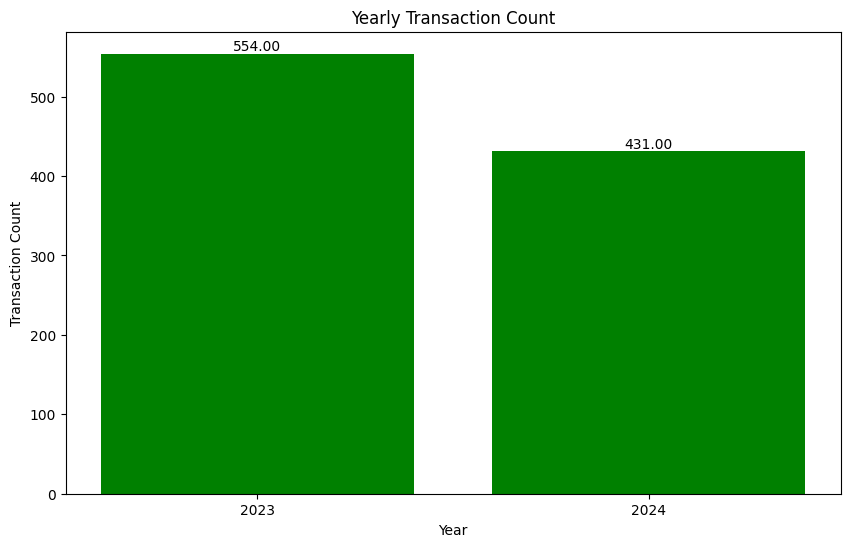

In [ ]:
# Total number of Transaction made over year
yearly_transaction = (
    clean_bank_stats
    .year
    .value_counts()
    .rename('count')
    .to_frame()
)

yearly_transaction

# set the axis
yearly_transaction.index = ['2023', '2024']

fig, ax = plt.subplots(figsize=(10,6))

bar = ax.bar(yearly_transaction.index, yearly_transaction['count'], color='g')

# adding labels to each bar
ax.bar_label(bar, fmt="%.2f" )
ax.set_title('Yearly Transaction Count')
ax.set_xlabel('Year')
ax.set_ylabel('Transaction Count')

In [ ]:
# What is the distribution of transaction amounts (e.g., small vs. large transactions)?
# (define small and large transactions by yourself)

small_transactions = clean_bank_stats[
    (clean_bank_stats['amount']<1000)
]
print(f'Small Transactions: {small_transactions.shape[0]}')

large_transactions = clean_bank_stats[
    (clean_bank_stats['amount']>1000)
]

print(f'Large Transactions: {large_transactions.shape[0]}')

Small Transactions: 820
Large Transactions: 149


In [ ]:
# Analyze the frequency of different transaction types (debit vs. credit).

# bank_statement[bank_statement['type'] == 'DEBIT'].shape[0]
# bank_statement[bank_statement['type'] == 'CREDIT'].shape[0]

(
    clean_bank_stats
    .type
    .value_counts()
    .to_frame()
)

,count
type,
DEBIT,695
CREDIT,290


Text(0, 0.5, 'Transaction Types Count')

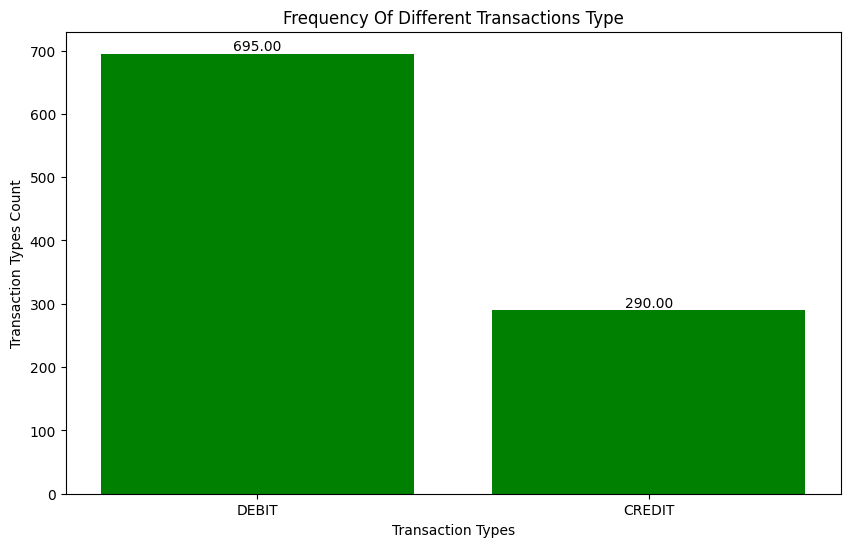

In [ ]:
Transaction_Type = (
    clean_bank_stats
    .type
    .value_counts()
    .to_frame()
)

fig, ax = plt.subplots(figsize=(10,6))

bar = ax.bar(Transaction_Type.index, Transaction_Type['count'], color='g')

# adding labels to each bar
ax.bar_label(bar, fmt="%.2f" )
ax.set_title('Frequency Of Different Transactions Type')
ax.set_xlabel('Transaction Types')
ax.set_ylabel('Transaction Types Count')

### **6.2 Balance Analysis**

Text(0, 0.5, 'Current Balance')

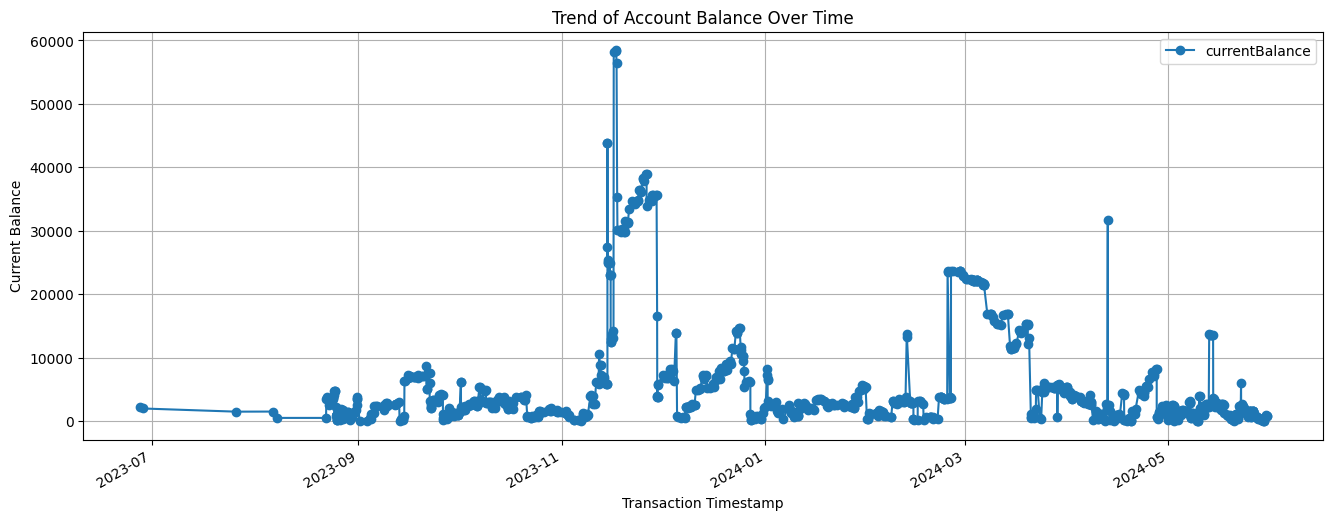

In [ ]:
# What is the trend of the account balance over time?
(
    bank_statement[['transactionTimestamp','currentBalance']]
    .sort_values('transactionTimestamp')
    .astype({'currentBalance':float})
    .plot(grid=True, x='transactionTimestamp', y='currentBalance', figsize=(16,6), marker='o',)
)

plt.title('Trend of Account Balance Over Time')
plt.xlabel('Transaction Timestamp')
plt.ylabel('Current Balance')

>- **Balance Trend Over Time:** We plotted the account balance over time to see how it changes. This helps us understand the financial health of the account.

>- **Significant Changes:** We looked for periods where the account balance changed significantly. This might indicate major expenses or income.

### **6.3 Spending Patterns**

In [ ]:
# What are the main categories of expenses (e.g., fuel, Ecommerce, food, shopping, ATM withdrawals, UPI transactions)?
# frequence of narration categories

(
    clean_bank_stats
    .narrationCategory
    .value_counts()
    .to_frame()
)

,count
narrationCategory,
UPI Transaction,789
NEFT Transaction,159
Other,30
Interest Payment,4
ATM Withdrawal,3


Text(0.5, 1.0, 'Main Categories of Expenses and there Frequncy')

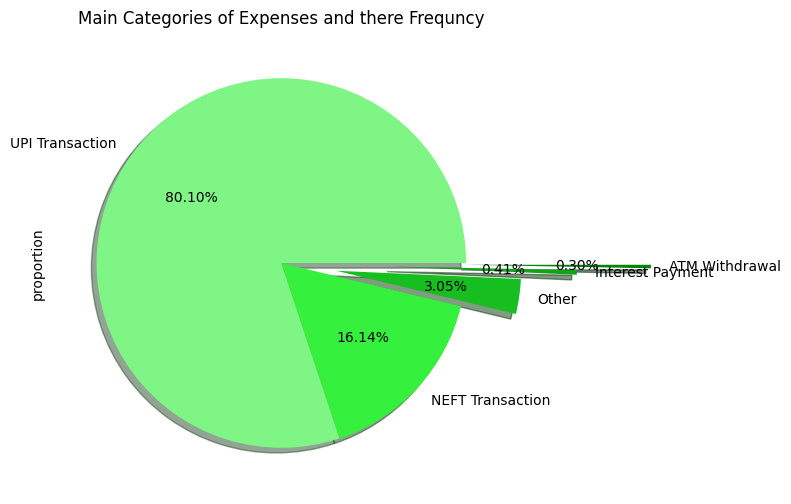

In [ ]:
# visualization of frequnecy of Narration categroies

ax = (
    clean_bank_stats
    .narrationCategory
    .value_counts(normalize=True)
    .sort_values(
        ascending=False
    )
    .plot(
        kind='pie',
        figsize=(10,6),
        autopct='%.2f%%',
        explode=[0,0,0.3,0.6,1.0],
        shadow=True,
        colors = ['#7EF584',"#35F13E",'#17BE1F',"#11A218",'#05830B']
      )

)

ax.set_title('Main Categories of Expenses and there Frequncy')

In [ ]:
# Calculate the total amount spent in each category:

(
    clean_bank_stats
    .groupby(['narrationCategory'])['amount']
    .sum()
    .to_frame()
)

,amount
narrationCategory,
ATM Withdrawal,13500.00
Interest Payment,135.00
NEFT Transaction,172430.51
Other,69502.00
UPI Transaction,587092.90


Text(0.5, 1.0, 'Amount of Spending in Each Category')

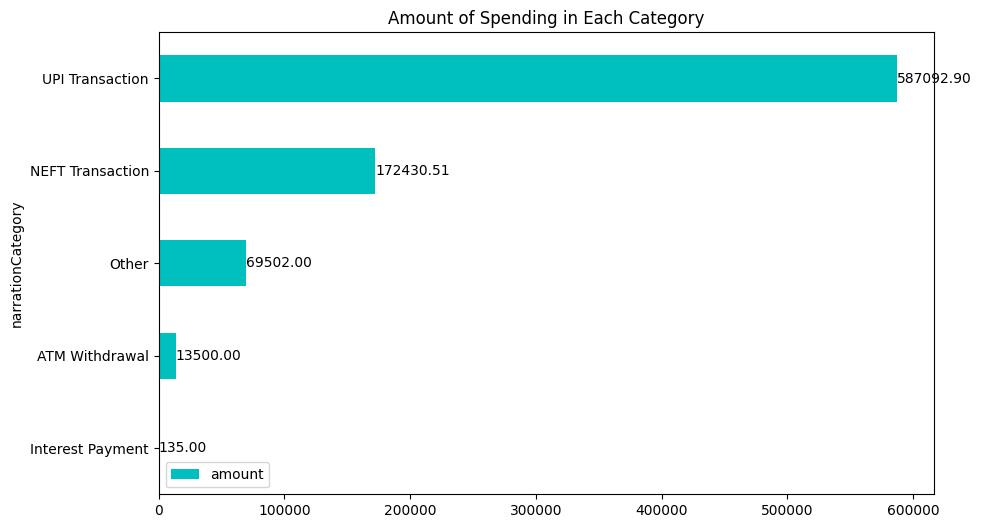

In [ ]:
# visualization over amount of spending in each category

Amt = (
    clean_bank_stats
    .groupby(['narrationCategory'])['amount']
    .sum()
    .to_frame()
    .sort_values(by='amount')
)

ax = Amt.plot(kind='barh', figsize=(10,6), color='c')

ax.bar_label(ax.containers[0], fmt='%.2f')
plt.title('Amount of Spending in Each Category')

### **6.4 Income Analysis**

In [ ]:
print("Main Source Of Income:\n ")

income_source = (
    clean_bank_stats
    .narrationCategory
    .value_counts()
)

income_source

Main Source Of Income:
 


narrationCategory
UPI Transaction     789
NEFT Transaction    159
Other                30
Interest Payment      4
ATM Withdrawal        3
Name: count, dtype: int64

In [ ]:
# Calculate the total amount received from each source by 'narrationCategory'

credit_trans = clean_bank_stats[
    clean_bank_stats['type'] == 'CREDIT'
]

Amt_income = (
    credit_trans
    .groupby(['narrationCategory'])['amount']
    .sum()
    .to_frame()
    .sort_values(
        by='amount',
        ascending=False
    )
)

Amt_income

,amount
narrationCategory,
UPI Transaction,179333.00
NEFT Transaction,172430.51
Other,68672.00
Interest Payment,135.00


In [ ]:
# Analyze the timing and amount of income
inc_time = (
    credit_trans
    .groupby(['year','month'])['amount']
    .sum()
    .reset_index()
)

inc_time

,year,month,amount
0,2023,7,15.00
1,2023,8,12664.00
2,2023,9,22605.00
3,2023,10,21487.00
4,2023,11,115722.00
5,2023,12,37953.51
6,2024,1,22185.00
7,2024,2,63724.00
8,2024,3,25420.00
9,2024,4,58707.00


[Text(0, 0, 'UPI Transaction'),
 Text(1, 0, 'NEFT Transaction'),
 Text(2, 0, 'Other'),
 Text(3, 0, 'Interest Payment')]

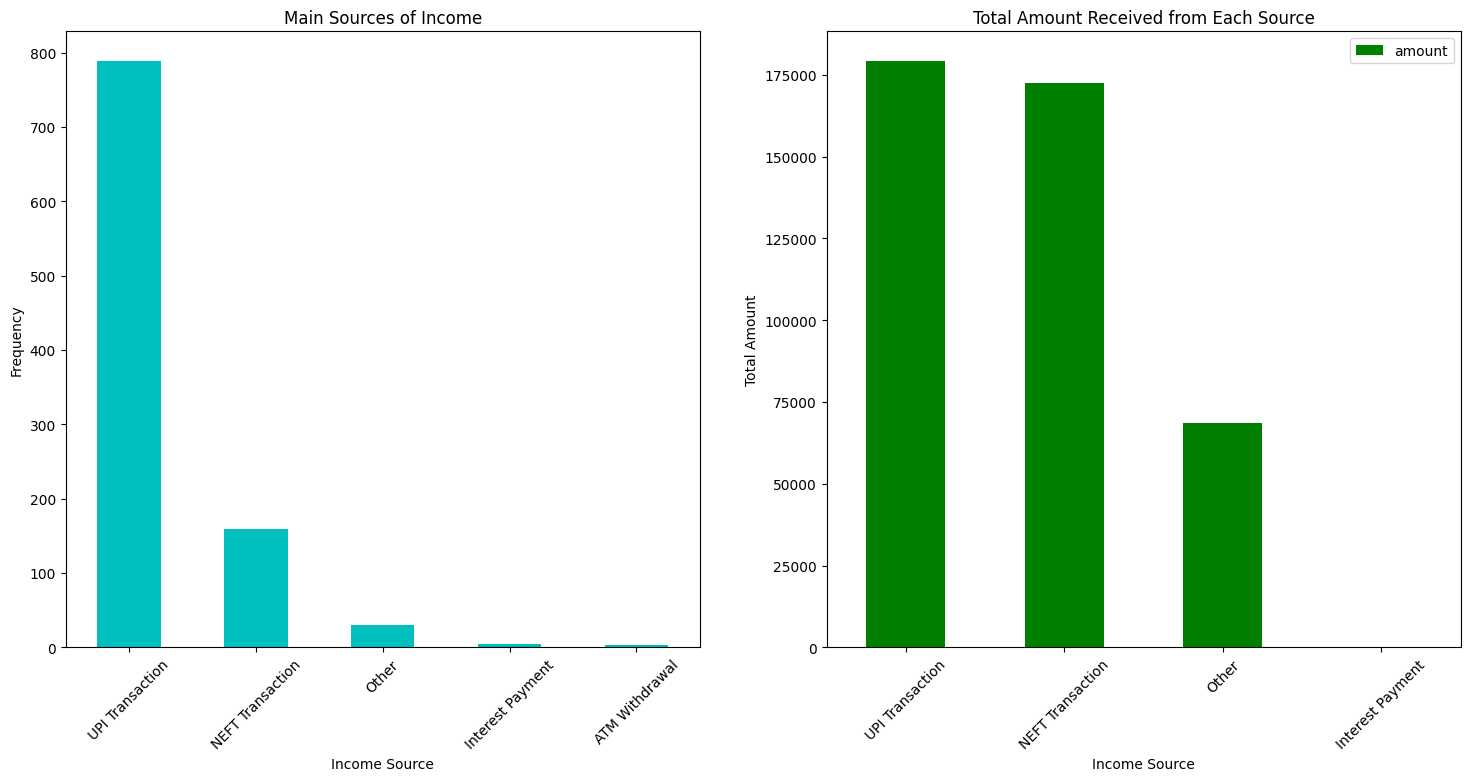

In [188]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))

income_source.plot(kind='bar', ax=ax[0], color='c')
ax[0].set_title('Main Sources of Income')
ax[0].set_xlabel('Income Source')
ax[0].set_ylabel('Frequency')
ax[0].set_xticklabels(income_source.index, rotation=45)

Amt_income.plot(kind='bar', ax=ax[1], color='g')
ax[1].set_title('Total Amount Received from Each Source')
ax[1].set_xlabel('Income Source')
ax[1].set_ylabel('Total Amount')
ax[1].set_xticklabels(Amt_income.index, rotation=45)

>- As we seen above that main income source have most frequency of UPI , NEFT transcations.

>- The largest amount of income comes from the "UPI and NEFT" category

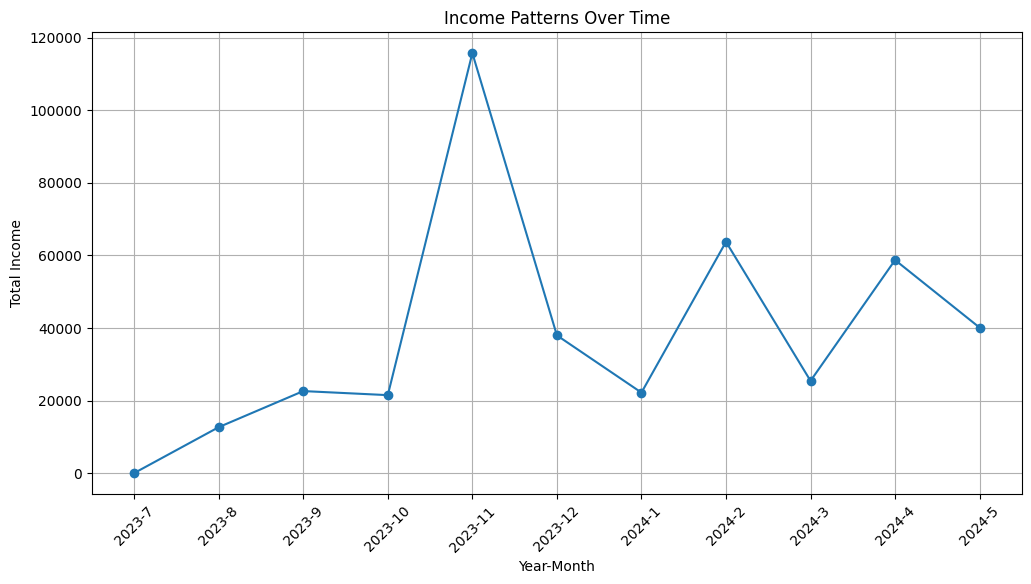

In [190]:
# Plot income timing patterns
plt.figure(figsize=(12, 6))
plt.plot(inc_time['year'].astype(str) + '-' + inc_time['month'].astype(str), inc_time['amount'], marker='o')
plt.title('Income Patterns Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Income')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

>- **Patterns of Income over Time** --> From Oct 2023 to dec 2023 most of salary hike are there means highest income acheived about 120000 /-
>- for rest of the months income shows with some fluctuations.

### **6.5 Alert Generation**

In [191]:
# Identify any unusual or suspicious transactions.
# Generate alerts for low balance or high expenditure periods.

# lets define the criteria to genearte alert

low_balance_threshold = 500.0
high_expenditure_threshold = 1000.0

In [192]:
# lets identify low balance alerts

low_balance_alert = clean_bank_stats[clean_bank_stats['currentBalance'] < low_balance_threshold]
low_balance_alert

,type,mode,amount,currentBalance,txnId,reference,transactionTime,year,month,day,narrationCategory
26,DEBIT,UPI,1000.0,175.80,S18720196,Unknown,16:56:59,2023,8,25,UPI Transaction
27,DEBIT,UPI,30.0,145.80,S22642750,Unknown,18:23:59,2023,8,25,UPI Transaction
28,CREDIT,OTHERS,51.0,196.80,S23309045,Unknown,18:37:02,2023,8,25,Other
29,DEBIT,UPI,1.0,195.80,S51405185,Unknown,15:06:16,2023,8,26,UPI Transaction
36,DEBIT,UPI,1499.0,315.80,S80757332,Unknown,12:19:54,2023,8,27,UPI Transaction
...,...,...,...,...,...,...,...,...,...,...,...
976,DEBIT,UPI,240.9,178.41,S43796126,Unknown,08:53:10,2024,5,29,UPI Transaction
977,DEBIT,UPI,130.0,48.41,S53022278,Unknown,12:01:51,2024,5,29,UPI Transaction
978,CREDIT,UPI,300.0,348.41,S66468359,Unknown,17:10:42,2024,5,29,UPI Transaction
979,DEBIT,UPI,245.0,103.41,S66551053,Unknown,17:12:19,2024,5,29,UPI Transaction


>- Alterinig for Low balanced indicates that you should avoid overdraft fees.


In [193]:
# lets identify high expdinture alerts
# for that we ahve see the debited transaction first

debit_transaction = clean_bank_stats[clean_bank_stats['type'] == 'DEBIT']

high_expenditure_alert = debit_transaction[debit_transaction['amount'] > high_expenditure_threshold]
high_expenditure_alert

,type,mode,amount,currentBalance,txnId,reference,transactionTime,year,month,day,narrationCategory
8,DEBIT,UPI,1200.0,2624.80,S20566812,Unknown,08:17:48,2023,8,23,UPI Transaction
17,DEBIT,UPI,2480.0,2244.80,S1271195,Unknown,10:24:38,2023,8,25,UPI Transaction
18,DEBIT,UPI,1450.0,794.80,S1851691,Unknown,10:39:35,2023,8,25,UPI Transaction
36,DEBIT,UPI,1499.0,315.80,S80757332,Unknown,12:19:54,2023,8,27,UPI Transaction
40,DEBIT,UPI,1200.0,195.80,S57790074,Unknown,11:49:00,2023,8,29,UPI Transaction
...,...,...,...,...,...,...,...,...,...,...,...
848,DEBIT,UPI,1500.0,1323.21,S73019910,Unknown,16:53:22,2024,5,7,UPI Transaction
869,DEBIT,UPI,2000.0,2030.21,S25942694,Unknown,15:13:20,2024,5,10,UPI Transaction
889,DEBIT,UPI,10000.0,3584.31,S10609765,Unknown,11:51:56,2024,5,14,UPI Transaction
911,DEBIT,UPI,1300.0,1259.31,S82091692,Unknown,18:51:36,2024,5,17,UPI Transaction


>- High Expenditure helps you to Monitor the Outflows of you cash. Which helps to manage the budgets.

In [200]:
# Identify any unusual or suspicious transactions.

# Now we are finding that the transcation over data and further we comapred that with our usual spending by mean and std.
# beacuse multplying std * 2 means overall 95% data under observation

mean_amount = debit_transaction['amount'].mean()
std_amount = debit_transaction['amount'].std()
suspicious_limit = mean_amount + 2 * std_amount
suspicious_transaction = debit_transaction[debit_transaction['amount'] > suspicious_limit]
suspicious_transaction

,type,mode,amount,currentBalance,txnId,reference,transactionTime,year,month,day,narrationCategory
277,DEBIT,UPI,16500.0,27391.80,S66498670,Unknown,18:49:41,2023,11,14,UPI Transaction
285,DEBIT,UPI,10000.0,12970.80,S7201813,Unknown,17:48:21,2023,11,15,UPI Transaction
295,DEBIT,UPI,21000.0,35400.80,S82212459,Unknown,16:34:54,2023,11,17,UPI Transaction
296,DEBIT,UPI,5200.0,30200.80,S88311015,Unknown,18:32:29,2023,11,17,UPI Transaction
332,DEBIT,UPI,19000.0,16625.80,S50294642,Unknown,16:15:33,2023,11,29,UPI Transaction
333,DEBIT,UPI,12700.0,3925.80,S52850056,Unknown,17:09:47,2023,11,29,UPI Transaction
353,DEBIT,UPI,13000.0,865.80,S8245037,Unknown,15:50:06,2023,12,5,UPI Transaction
537,DEBIT,ATM,10000.0,3244.81,S47446558,Unknown,14:01:51,2024,2,13,ATM Withdrawal
572,DEBIT,UPI,20000.0,3683.91,S77431539,Unknown,11:08:34,2024,2,25,UPI Transaction
648,DEBIT,UPI,12000.0,1119.11,S75496843,Unknown,18:56:48,2024,3,20,UPI Transaction


>- **Suspicious Transaction :** Now Suspicious means here we are calculating that over all transaction of specific employee is larger than its usual spending?

>- So here we have 12 records with unusual transactions.

>- We calculate this by taking mean of overall amount spended + 2* std (variations). So if it is greater than amount then it is suspicious.

>- Multplying by 2*std means here total 95% data under observation and taking aveg of amount from over all tpe like credit and debit.

>- This will helps find the fraud.

### **For Plotting Purpose we combine the year, month , day and time and mking them as one column for plotting purpose**

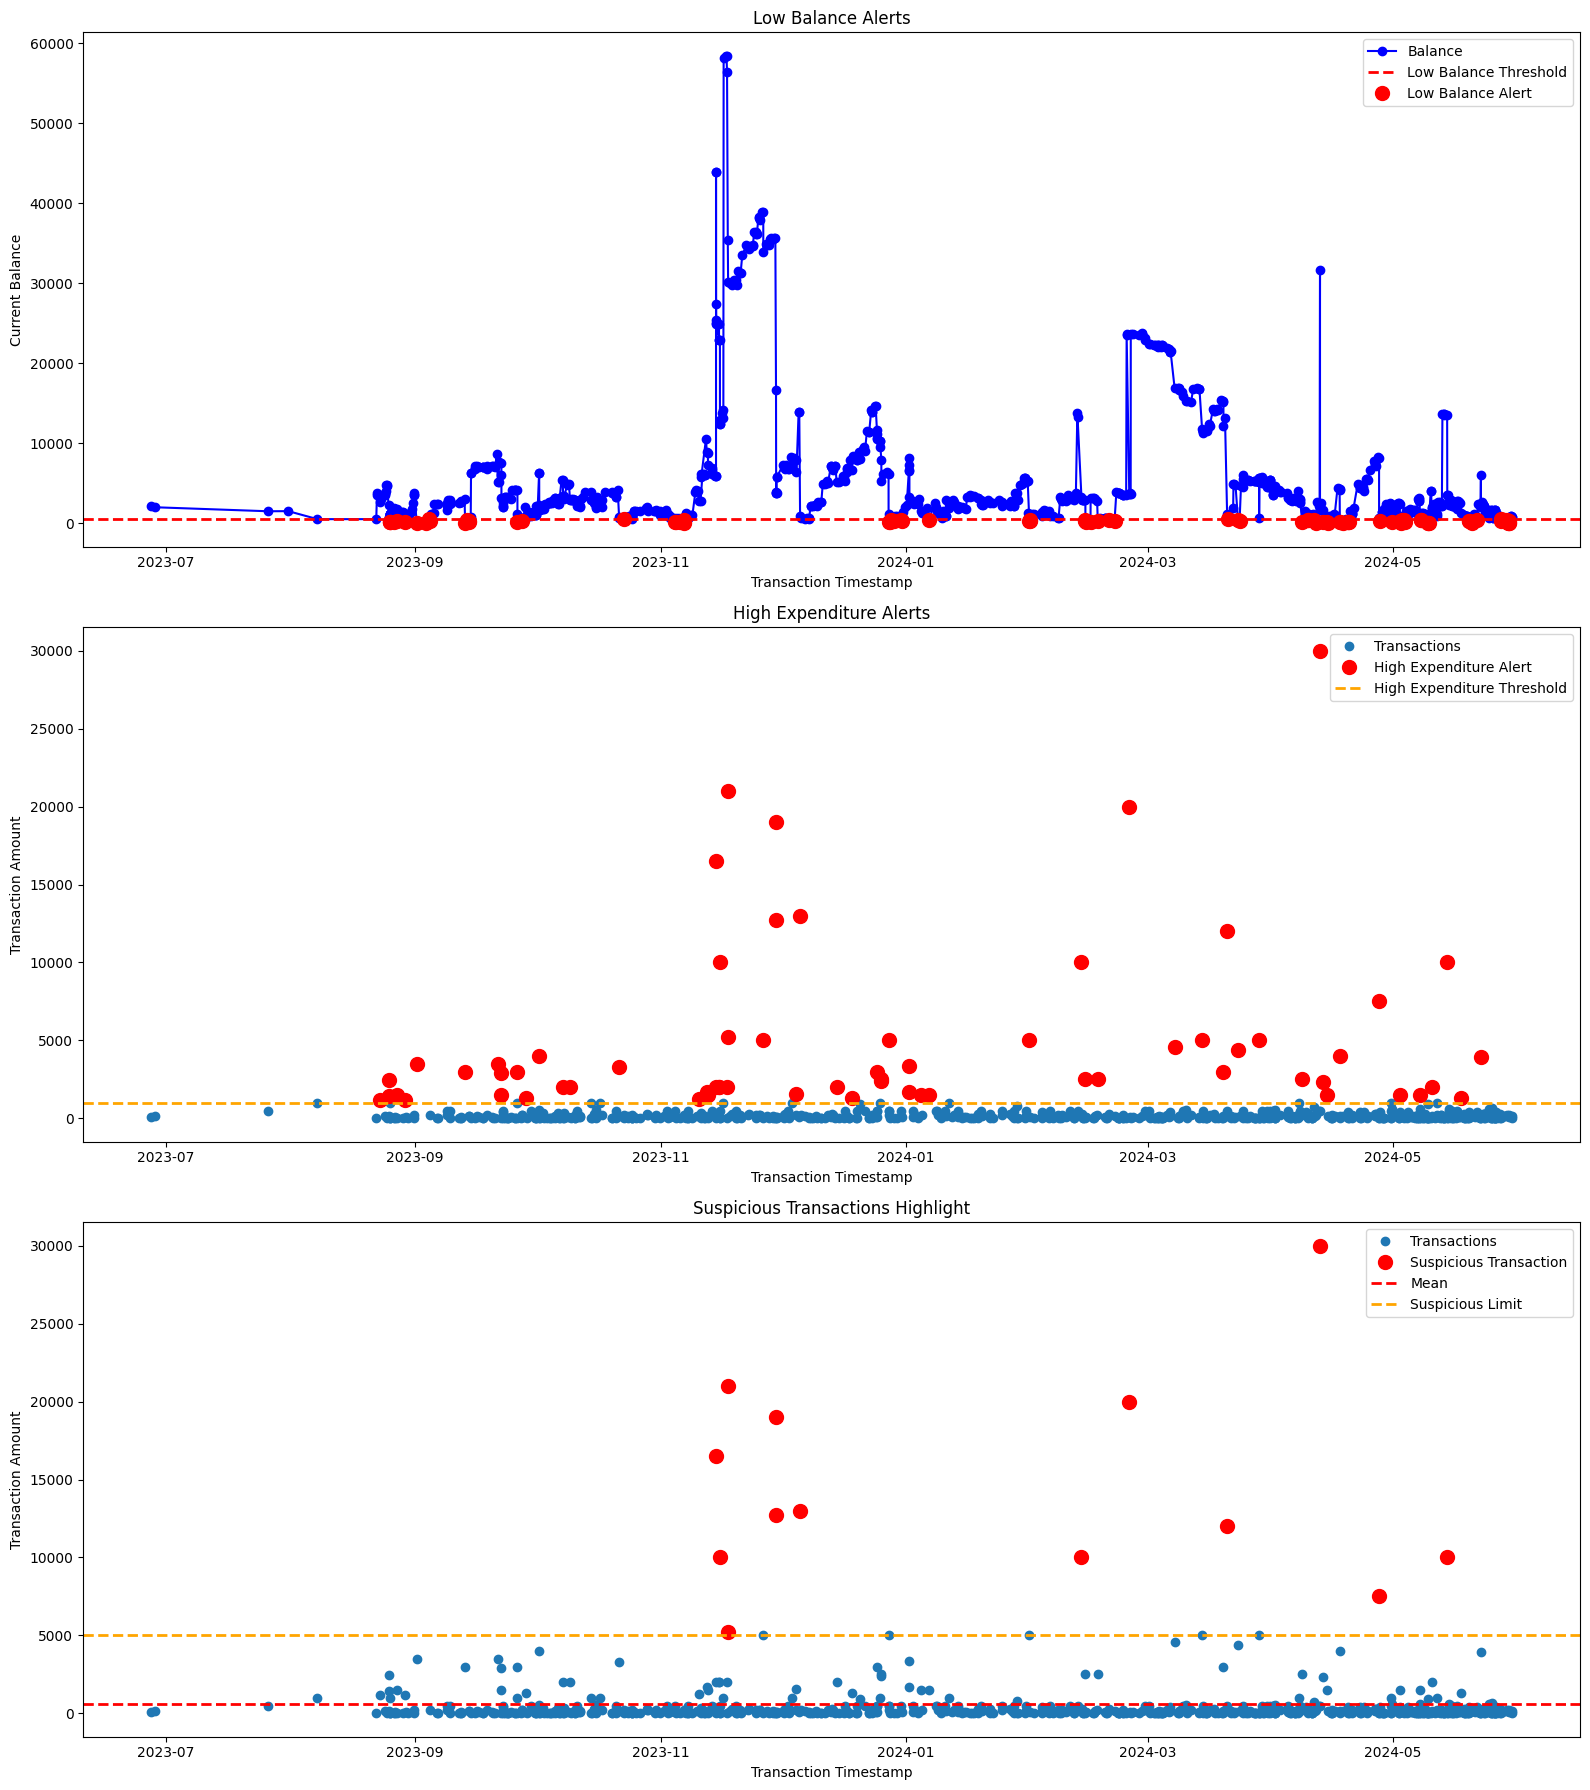

In [204]:
clean_bank_stats['datetime'] = pd.to_datetime(clean_bank_stats[['year', 'month', 'day']]) + pd.to_timedelta(clean_bank_stats['transactionTime'].astype(str))

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(16, 18))


ax1.plot(clean_bank_stats['datetime'], clean_bank_stats['currentBalance'], marker='o', linestyle='-', color='blue', label='Balance')
ax1.axhline(low_balance_threshold, color='red', linestyle='--', linewidth=2, label='Low Balance Threshold')
ax1.plot(low_balance_alert['datetime'], low_balance_alert['currentBalance'], 'ro', markersize=10, label='Low Balance Alert')
ax1.set_title('Low Balance Alerts')
ax1.set_xlabel('Transaction Timestamp')
ax1.set_ylabel('Current Balance')
ax1.legend()

ax2.plot(debit_transaction['datetime'], debit_transaction['amount'], 'o', label='Transactions')
ax2.plot(high_expenditure_alert['datetime'], high_expenditure_alert['amount'], 'ro', markersize=10, label='High Expenditure Alert')
ax2.axhline(high_expenditure_threshold, color='orange', linestyle='--', linewidth=2, label='High Expenditure Threshold')
ax2.set_title('High Expenditure Alerts')
ax2.set_xlabel('Transaction Timestamp')
ax2.set_ylabel('Transaction Amount')
ax2.legend()

ax3.plot(debit_transaction['datetime'], debit_transaction['amount'], 'o', label='Transactions')
ax3.plot(suspicious_transaction['datetime'], suspicious_transaction['amount'], 'ro', markersize=10, label='Suspicious Transaction')
ax3.axhline(mean_amount, color='red', linestyle='--', linewidth=2, label='Mean')
ax3.axhline(suspicious_limit, color='orange', linestyle='--', linewidth=2, label='Suspicious Limit')
ax3.set_title('Suspicious Transactions Highlight')
ax3.set_xlabel('Transaction Timestamp')
ax3.set_ylabel('Transaction Amount')
ax3.legend()

plt.tight_layout()
plt.show()